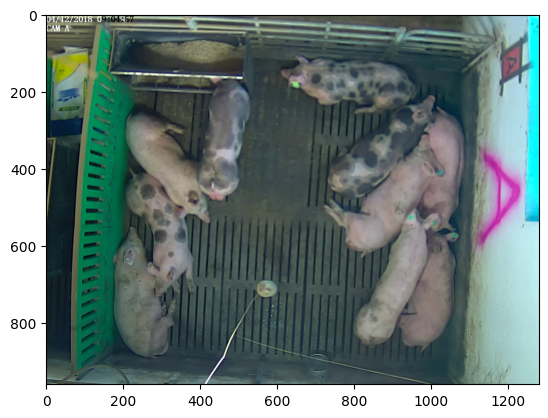

In [1]:
import imageio.v3 as iio
import skimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy

path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"

frame = iio.imread(path, index=100)

plt.imshow(frame)
plt.show()

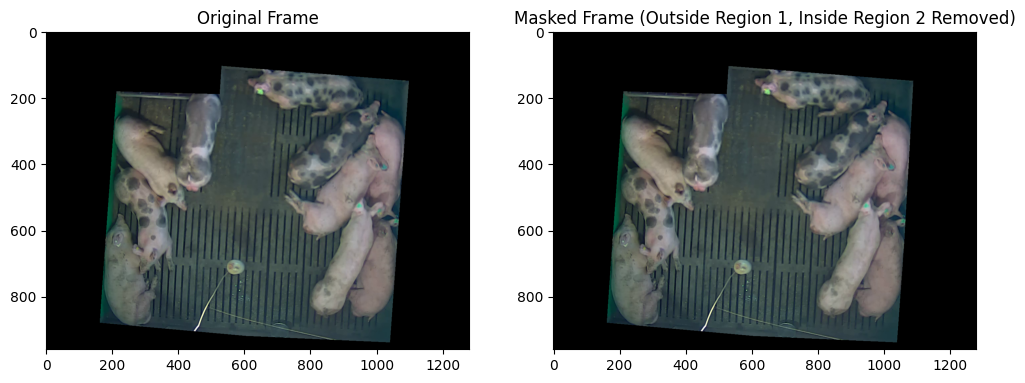

In [22]:
# Define the two regions (vertices)
vertices1 = np.array([[900, 160], [80, 220], [150, 1090], [945, 1045]])  # First region to keep
vertices2 = np.array([[180, 150], [40, 170], [40, 535], [190, 525]])      # Second region to remove

# Create a mask for the region to keep (inside vertices1)
mask1 = np.zeros(frame.shape[:2], dtype=bool)
rr1, cc1 = skimage.draw.polygon(vertices1[:, 0], vertices1[:, 1], mask1.shape)
mask1[rr1, cc1] = True

# Create a mask for the region to remove (inside vertices2)
mask2 = np.zeros(frame.shape[:2], dtype=bool)
rr2, cc2 = skimage.draw.polygon(vertices2[:, 0], vertices2[:, 1], mask2.shape)
mask2[rr2, cc2] = True

# Create the final mask
# Final mask keeps region inside vertices1 (mask1), and removes region inside vertices2 (mask2)
final_mask = mask1 & ~mask2  # Inside vertices1 and outside vertices2

# Apply the final mask:
masked_frame = np.zeros_like(frame)  # Start with a black frame
masked_frame[final_mask] = frame[final_mask]  # Keep pixels inside the final mask

# Display original and masked images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")

ax[1].imshow(masked_frame)
ax[1].set_title("Masked Frame (Outside Region 1, Inside Region 2 Removed)")

frame = masked_frame

plt.show()

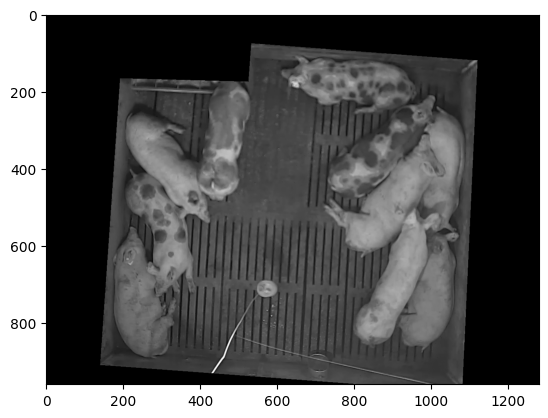

In [7]:
frame_gray = skimage.color.rgb2gray(frame)
plt.imshow(frame_gray, cmap="gray")
plt.show()